In [14]:
#import pykalman

#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt

In [31]:

def kalman_multi(x, P, measurement, R, motion = np.matrix('0. 5. 0. 5.').T, Q = np.matrix(np.eye(4))):
    
    """
    Parameters:    
    x: initial state 4-tuple of location and velocity: (x0, x1, x0_dot, x1_dot)
    P: initial uncertainty convariance matrix
    measurement: observed position
    R: measurement noise 
    motion: external motion added to state vector x
    Q: motion noise (same shape as P)
    
    """
    return kalman_main(x, P, measurement, R, motion, Q,
                       F = np.matrix('''
                       1. 0. 1. 0.;
                       0. 1. 0. 1.;
                       0. 0. 1. 0.;
                       0. 0. 0. 1.
                       '''),
                       H = np.matrix('''
                       1. 0. 0. 0.;
                       0. 1. 0. 0.'''))

In [32]:
#defining all the required variables
#x,P: Predict the state using state's dynamic model

def kalman_main(x, P, measurement, R, motion, Q, F, H):
    '''
    Parameters:
    F: next state function: x_prime = F*x
    H: measurement function: position = H*x
    
    '''
    # Measured value
    y = np.matrix(measurement).T - H * x
    
    # Update equation
    I = np.matrix(np.eye(F.shape[0])) # identity matrix
    S = H * P * H.T + R  # residual convariance
    K = P * H.T * S.I    # Kalman gain
    x = x + K*y
    
    P = (I - K*H)*P

    # PREDICT x, P based on motion
    x = F*x + motion
    P = F*P*F.T + Q

    return x, P
    

In [34]:
def kalman_simulate():
    x = np.matrix('0. 0. 0. 0.').T 
    P = np.matrix(np.eye(4))*1

    N = 20
    true_x = np.linspace(0.0, 10.0, N)
    true_y = true_x**2
    observed_x = true_x + 0.05*np.random.random(N)*true_x
    observed_y = true_y + 0.05*np.random.random(N)*true_y
    plt.plot(true_x, true_y, 'b-')
    plt.plot(observed_x, observed_y, 'ro')
    result = []
    R = np.array([
        [0.50, 0],
        [0, 0.50]
        ])
    for meas in zip(observed_x, observed_y):
        x, P = kalman_multi(x, P, meas, R)
        result.append((x[:2]).tolist())
    kalman_x, kalman_y = zip(*result)
    plt.plot(kalman_x, kalman_y, 'g-')
    plt.legend(['Actual Measurements','noisy position measurements', 'Kalman predicted positions'])
    plt.xlabel("Time steps")
    plt.ylabel("Position")
    plt.show()

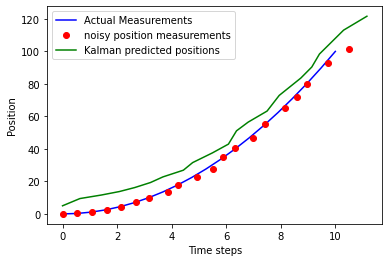

In [35]:
kalman_simulate()